## CS 842 Course Project: Implementing and Interpreter for Graph Description Language (GDL)
#### Author: Mehdi Bolourian
#### Dec. 2024

In [2]:
import time
import interpreter     as inr
import classifier      as clr
from   IPython.display import Image, display, clear_output

## 1) Testing the GDL Interpreter independently

Processing Program 3...
Abstract Syntax Tree:


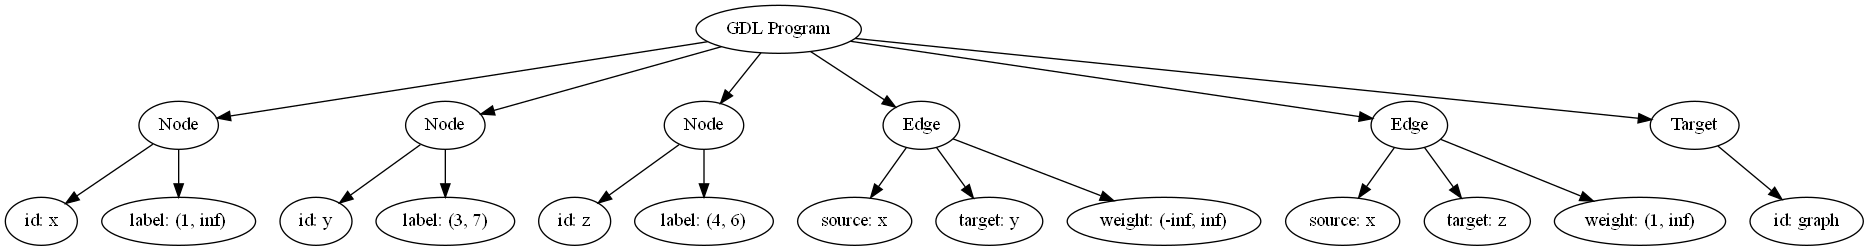

Saved to ast.png

Interpreted Graph from the GDL Program:


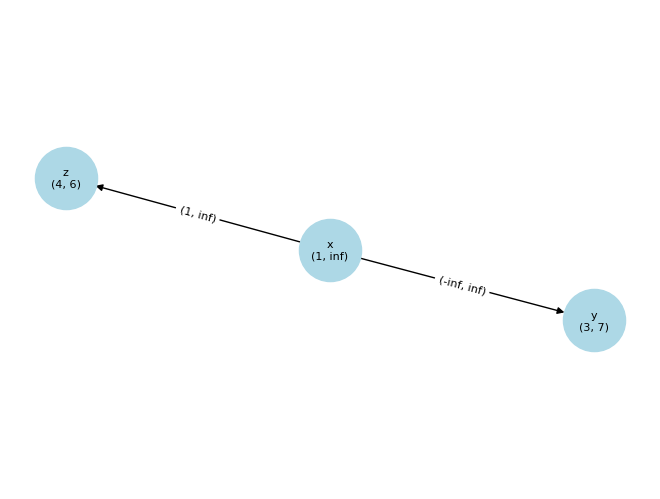

KeyboardInterrupt: 

In [9]:
## Test scenarios: (With and without errors)
program = []
MAX     = 0

program.append("""
    node x <[1,2]>
    node y <[3,7]>
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1,6]>
    target node x
    """)
MAX += 1
program.append("""
    node x <[1,]>
    node y <[3,7]>
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1,]>
    target node x
    """)
MAX += 1
program.append("""
    node x <[1,]>
    node y <[3,7]>
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1,]>
    target graph
    """)
MAX += 1
program.append("""
    node x <[1,]>
    node y 
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1
    target graph
    """)
MAX += 1
program.append("""
    node <[1,]>
    node y <[3,7]>
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1
    target graph
    """)
MAX += 1
program.append("""
    node x 1,
    node y <[3,7]>
    node z <[4,6]>
    edge (x,y)
    edge (x,z) <[1
    target graph
    """)
MAX += 1

for i in range(0,MAX):
    try:
        print(f"Processing Program {i + 1}...")
        
        lexer = inr.Lexer(program[i])
        parser = inr.Parser(lexer)
        ast = parser.parse()
    
        # AST Visualization
        visualizer = inr.ASTVisualizer(ast)
        visualizer.visualize()
    
        # Semantic Analysis
        analyzer = inr.SemanticAnalyzer(ast)
        analyzer.analyze()
    
        # Graph Generation
        generator = inr.GraphGenerator(ast)
        G = generator.generate()
        generator.plot(G)

        time.sleep(2)
        clear_output(wait=True)
        
    except inr.InterpreterError as e:
        print(f"Interpreter Error: {e}")
        time.sleep(2)
        clear_output(wait=True)

clear_output(wait=True)
print(f"Successfuly finished the interpreter test!")

## 2) Generating the GDL Library

Generated GDL Library with Ranges and Scores (0-1):

Program 1 (Score: 0.83):
node x3
node x10
node x1
edge (x1,x3) <[1,]>
edge (x3,x1)
edge (x10,x1)
edge (x1,x3) <[1,9]>
edge (x1,x3)
target node x10

Program 2 (Score: 0.93):
node x2 <[,9]>
node x9
node x10
node x6
edge (x9,x2)
edge (x9,x10)
target node x2

Program 3 (Score: 0.27):
node x2 <[5,]>
node x5 <[,5]>
node x8 <[,1]>
node x9 <[,5]>
node x1 <[,6]>
node x6 <[1,7]>
node x3
node x10 <[,6]>
edge (x1,x2) <[,5]>
edge (x5,x1)
edge (x1,x3) <[5,8]>
target node x3

Program 4 (Score: 0.43):
node x7 <[6,]>
node x5 <[2,]>
node x4
node x10
node x3
edge (x4,x4)
edge (x3,x4)
edge (x4,x10)
edge (x3,x10) <[5,]>
edge (x7,x3)
target node x4

Program 5 (Score: 0.88):
node x5
node x9
node x8 <[6,13]>
node x3
node x7 <[8,]>
edge (x8,x7) <[5,12]>
edge (x9,x9) <[4,]>
edge (x7,x3)
edge (x8,x8)
edge (x3,x9)
target node x5

Program 6 (Score: 0.85):
node x6
node x4
node x7
node x5
node x1 <[3,]>
node x2 <[10,10]>
node x8 <[4,]>
node x9 <[,7]>
node x3 <[,1]

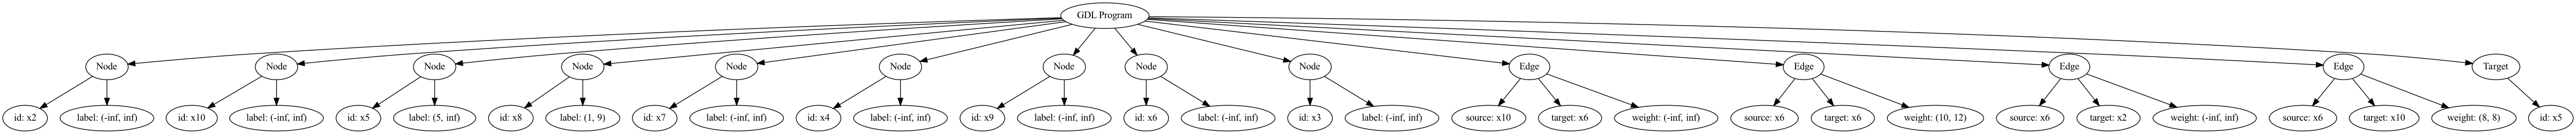

Saved to ast.png

Interpreted Graph from the GDL Program:


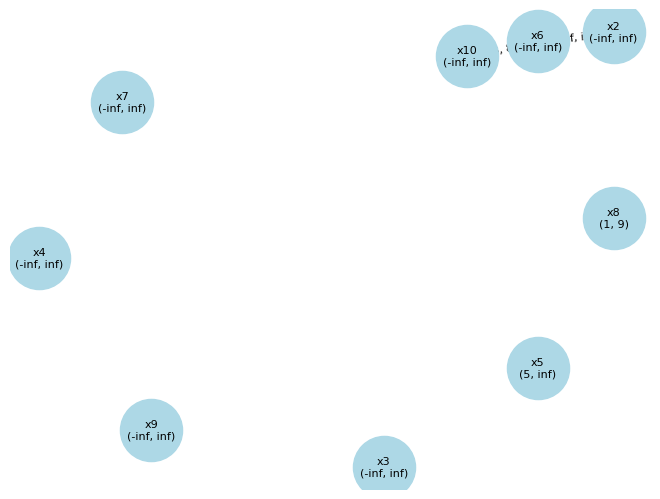

In [5]:
# Nodes in the graph
nodes = [f"x{i}" for i in range(1, 11)]

# Generate a library of 100 GDL programs ensuring coverage
library_size = 100
gdl_library = clr.GDLProgram.generate_library(size=library_size, node_list=nodes)

# Print the generated GDL programs
print("Generated GDL Library with Ranges and Scores (0-1):")
for idx, program in enumerate(gdl_library, start=1):
    print(f"\nProgram {idx} (Score: {program.score:.2f}):\n{program.text}")

# Initialize the GDL Model
gdl_model = clr.GDLModel()
library_size = 100
gdl_model.initialize(library_size=library_size, node_list=nodes)

# Filter by a specific target node
target = "node x5"
filtered_programs = gdl_model.filter_by_target(target_node=target)
print(f"\nFiltered Programs Targeting {target}:")
#for program in filtered_programs:
print(f"\n{program.text} (Score: {program.score:.2f})")

try:
    lexer = inr.Lexer(filtered_programs.text)
    parser = inr.Parser(lexer)
    ast = parser.parse()

    # AST Visualization
    visualizer = inr.ASTVisualizer(ast)
    visualizer.visualize()

    # Semantic Analysis
    analyzer = inr.SemanticAnalyzer(ast)
    analyzer.analyze()

    # Graph Generation
    generator = inr.GraphGenerator(ast)
    G = generator.generate()
    generator.plot(G)

    time.sleep(2)
    clear_output(wait=True)
    
except inr.InterpreterError as e:
    print(f"Interpreter Error: {e}")
    time.sleep(2)
    clear_output(wait=True)